In [ ]:
#yahoo finance
!pip install yfinance

#pytorch ignite
!pip install -q --pre pytorch-ignite==0.5.0.dev20230325

#fastai
!pip install -q fastbook==0.0.29

#pythainlp
!pip install -q pythainlp==5.1.0

#transformers
!pip install -q transformers==4.49.0

#datasets
!pip install -q datasets==3.4.1

#accelerate
!pip install -q accelerate==1.1.0

#autogluon
!pip install -q autogluon==1.2

!pip install numpy --upgrade --force-reinstall
!pip install pandas --upgrade --force-reinstall
!pip install yfinance --upgrade --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 96.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.3/187.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 85.2 MB/s eta 0:00:00
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.m

In [ ]:
!pip install ta

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
train_file_path = "/content/drive/My Drive/StockData/final_validtest_set.csv"
test_file_path = "/content/drive/My Drive/StockData/final_test_set.csv"

if os.path.exists(test_file_path):
    test_df = pd.read_csv(test_file_path)
    print("Data loaded from CSV.")
if os.path.exists(train_file_path):
    train_df = pd.read_csv(train_file_path)
    print("Data loaded from CSV.")

Mounted at /content/drive
Data loaded from CSV.
Data loaded from CSV.


In [2]:
import pandas as pd
import numpy as np
import torch
from fastai.data.core import DataLoaders
from fastai.tabular.data import TabularDataLoaders
from fastai.tabular.core import TabularPandas, Normalize, RegressionBlock
from fastai.tabular.all import *
from fastai.torch_core import tensor
from torch import nn
from fastai.learner import Learner
from fastai.metrics import mse
from fastai.callback.schedule import *
import yfinance as yf
import torch
from torch import nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

In [3]:
cont_vars = ['Open', 'High', 'Low', 'Close', 'Adj Close','Volume', 'rsi','stochastic','signal-stochastic','cci', 'williams%R','roc','awesome-oscillator','ultimate-oscillator','trix','KAMA','stochrsi','sma','macd','ema','adx','psar-up','psar-down', 'ichimoku_a','ichimoku_b','supertrend','KST','plus_di','minus_di','VI-dff','VI+','VI-','atr','bb_bbm',
              'donchianwidth','keltnerwidth','ulcer','chaikin_volatility','historical_volatility','upper_band','lower_band'] # Remove 'Ticker' from cont_vars
seq_length = 20
forecast_horizon = 14
target_col = 'return_14d'
ticker_col = 'Ticker'
date_col = 'Date'
batch_size = 64  # You can adjust this
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
import torch
from torch.utils.data import Dataset
from fastai.data.core import DataLoaders
import numpy as np
import pandas as pd # Ensure pandas is imported here

class TimeSeriesDataset(Dataset):
    def __init__(self, df, seq_length, forecast_horizon, cont_vars, target_col, ticker_col, date_col, index_map=None):
        self.seq_length = seq_length
        self.forecast_horizon = forecast_horizon
        self.cont_vars = cont_vars
        self.target_col = target_col
        self.ticker_col = ticker_col
        self.date_col = date_col

        # Sort and reset index for safe slicing (done once during initialization)
        df = df.sort_values([ticker_col, date_col]).reset_index(drop=True)

        # Store the dataframe
        self.df = df

        # Group by ticker for faster access
        self.groups = list(df.groupby(ticker_col))

        # Build index mapping: (ticker_idx, start_pos) for valid windows
        if index_map is None: # Build index map only if not provided (for the initial dataset)
            self.index_map = []
            for t_idx, (ticker, group) in enumerate(self.groups):
                n = len(group)
                # The valid sequence must end before the target position
                max_start = n - seq_length - forecast_horizon
                if max_start >= 0:
                     for start in range(max_start + 1): # Include max_start itself
                         # The target is at start + seq_length + forecast_horizon - 1
                         target_pos = start + seq_length + forecast_horizon - 1
                         # Basic check: Ensure sequence and target indices are within bounds
                         if start + seq_length <= n and target_pos < n:
                              self.index_map.append((t_idx, start))
        else: # Use provided index map (for creating subsets/empty datasets)
            self.index_map = index_map


    def __len__(self):
        return len(self.index_map)

    def __getitem__(self, idx):
        t_idx, start = self.index_map[idx]
        # Access the correct group using the stored groups list
        ticker, group = self.groups[t_idx]

        seq_start = start
        seq_end = start + self.seq_length
        target_pos = seq_end + self.forecast_horizon - 1

        # Extract data using the group slice
        # Ensure columns exist before accessing
        features = group.iloc[seq_start:seq_end][self.cont_vars].values.astype(np.float32)

        # Extract target value
        # Ensure target column exists before accessing
        target = group.iloc[target_pos][self.target_col].astype(np.float32)

        X = torch.tensor(features)  # shape: (seq_length, n_features)
        y = torch.tensor(target) # shape: () for a single value

        return X, y

    # Add the new_empty method required by fastai export
    def new_empty(self):
        # Return a new instance with the same parameters but an empty index_map
        # We pass the original df reference and groups to potentially save memory/time
        # but use an empty index_map.
        empty_dataset = TimeSeriesDataset(
            self.df.iloc[0:0], # Pass an empty dataframe slice
            self.seq_length,
            self.forecast_horizon,
            self.cont_vars,
            self.target_col,
            self.ticker_col,
            self.date_col,
            index_map=[] # Explicitly provide an empty index map
        )
        # Optionally, you might need to pass the groups object if accessed directly
        # empty_dataset.groups = self.groups # Depending on implementation
        return empty_dataset


def create_dataloaders_fastai(df, seq_length, forecast_horizon, cont_vars, target_col,
                              ticker_col, date_col, batch_size=64, valid_pct=0.2, shuffle_train=True):
    # Create the full dataset first
    full_dataset = TimeSeriesDataset(
        df, seq_length, forecast_horizon, cont_vars, target_col,
        ticker_col, date_col
    )

    # Split the index_map into train and validation indices
    n = len(full_dataset)
    if n == 0:
        print("Warning: Full dataset is empty after creating index map. Cannot create DataLoaders.")
        return None

    n_valid = int(n * valid_pct)
    n_train = n - n_valid

    # Get the indices for the train and validation sets
    # We use the indices of the index_map, not the raw dataframe indices
    indices = list(range(n))
    # Simple split: first n_train indices for training, rest for validation
    # For time series, a temporal split might be more appropriate, but this
    # matches the original code's logic of splitting the dataset indices.
    train_indices = indices[:n_train]
    valid_indices = indices[n_train:]

    # Create datasets for train and valid using the original full_dataset and the split indices
    # These are *not* torch.utils.data.Subset. They are views of the original dataset.
    train_ds = TimeSeriesDataset(
        df, seq_length, forecast_horizon, cont_vars, target_col,
        ticker_col, date_col, index_map=[full_dataset.index_map[i] for i in train_indices]
    )
    valid_ds = TimeSeriesDataset(
        df, seq_length, forecast_horizon, cont_vars, target_col,
        ticker_col, date_col, index_map=[full_dataset.index_map[i] for i in valid_indices]
    )


    # Use DataLoaders.from_dsets with the custom datasets
    dls = DataLoaders.from_dsets(
        train_ds,
        valid_ds,
        bs=batch_size,
        shuffle=shuffle_train, # Use the shuffle_train parameter
        # Add device if needed, or FastAI will handle it
        # device=device
    )
    return dls

Suggested learning rate: SuggestedLRs(valley=0.0010000000474974513)


epoch,train_loss,valid_loss,_rmse,time
0,0.006813,0.006815,0.082551,05:29
1,0.006408,0.006628,0.081413,05:31
2,0.006314,0.006624,0.081390,05:38
3,0.006236,0.006477,0.080483,05:31
4,0.006009,0.006548,0.080919,05:34
5,0.006249,0.006355,0.079720,05:36
6,0.005936,0.006379,0.079871,05:31
7,0.006179,0.006354,0.079712,05:30
8,0.006047,0.006178,0.078601,05:27
9,0.005784,0.006208,0.078790,05:34


Better model found at epoch 0 with valid_loss value: 0.0068146041594445705.
Better model found at epoch 1 with valid_loss value: 0.006628019735217094.
Better model found at epoch 2 with valid_loss value: 0.006624260917305946.
Better model found at epoch 3 with valid_loss value: 0.006477458402514458.
Better model found at epoch 5 with valid_loss value: 0.0063553317449986935.
Better model found at epoch 7 with valid_loss value: 0.006353978533297777.
Better model found at epoch 8 with valid_loss value: 0.006178079638630152.
No improvement since epoch 8: early stopping
Training complete and model saved to /content/drive/MyDrive/StockModels/lstm_learner.pkl


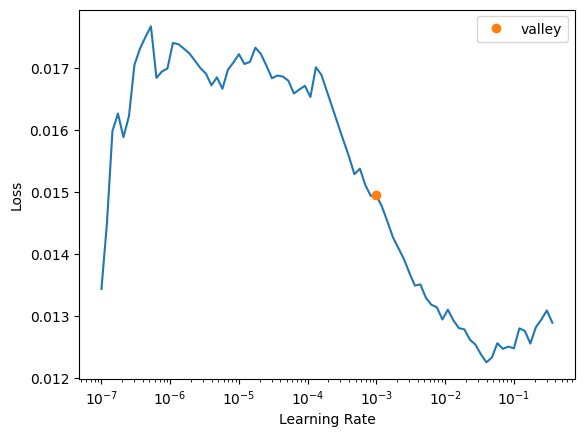

In [ ]:
import torch
import torch.nn as nn
from fastai.tabular.all import *
import os

# === Define the LSTM regression model ===
class LSTMRegressor(nn.Module):
    def __init__(self, n_features, hidden_size=128, num_layers=2, dropout=0.3):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0
        )
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        # x shape: (batch, seq_length, n_features)
        out, _ = self.lstm(x)
        last_out = out[:, -1, :]  # take output from last time step
        return self.fc(last_out).squeeze(-1)

# === Setup paths and parameters ===
learner_path = '/content/drive/MyDrive/StockModels'
os.makedirs(learner_path, exist_ok=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
batch_size = 64
valid_pct = 0.2222
shuffle_train = True

# === Create DataLoaders ===
dls = create_dataloaders_fastai(
    train_df, seq_length, forecast_horizon, cont_vars, target_col,
    ticker_col, date_col, batch_size=batch_size,
    valid_pct=valid_pct,
)

if dls is None:
    print("Error: DataLoaders creation failed. Please check data and parameters.")
else:
    n_features = len(cont_vars)

    # === Instantiate the LSTM model ===
    model = LSTMRegressor(n_features=n_features, hidden_size=128, num_layers=2, dropout=0.3).to(device)

    # === Create the FastAI learner ===
    learner = Learner(
        dls,
        model,
        loss_func=nn.MSELoss(),
        metrics=rmse,
        cbs=[
            EarlyStoppingCallback(monitor='valid_loss', patience=3),
            SaveModelCallback(monitor='valid_loss', fname='best_model')
        ]
    )

    # === Find learning rate ===
    lr_suggestion = learner.lr_find()
    print(f"Suggested learning rate: {lr_suggestion}")

    # === Train the model ===
    learner.fit_one_cycle(15, lr_max=lr_suggestion)

    # === Export the trained learner ===
    export_path = os.path.join(learner_path, 'lstm_learner.pkl')
    learner.export(export_path)
    print(f"Training complete and model saved to {export_path}")

